In [1]:
import pandas as pd #helps in reading,editing files/datasets
import numpy as np #scikit basically runs better in numpy array used to convert python lists into np array
import matplotlib.pyplot as plt #used to plot graphs if necessary
from sklearn import linear_model #we try to import linear model as it is needed(contains linear regression regressor)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#r2_score imported necessary metrices to determine amount of error 
#in our model

In [2]:
#next we fetched data from an excel file using pandas 
df=pd.read_csv('StudentsPerformance.csv')# used read_csv function to get data (which is in form of csv file) to get data here
df.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'mocktest1', 'mocktest2', 'Final_marks'],
      dtype='object')

In [3]:
df.shape#it gives the shape of data we will take 4 features from here gender ,mocktest1,mocktest2,test preparation course
#and our label will be Final_marks below is the shape of our data

(1000, 8)

In [4]:
#now we will be training 30% of data (300 instances ) and will use this data to predict rest
X=df[['gender','test preparation course','mocktest1','mocktest2']]
#changing string values to numeric 
X.loc[df['test preparation course']=='completed','test preparation course']=1
X.loc[df['test preparation course']=='none','test preparation course']=0
X.loc[df['gender']=='female','gender']=0
X.loc[df['gender']=='male','gender']=1
X

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,gender,test preparation course,mocktest1,mocktest2
0,0,0,72,72
1,0,1,69,90
2,0,0,90,95
3,1,0,47,57
4,1,0,76,78
...,...,...,...,...
995,0,1,88,99
996,1,0,62,55
997,0,1,59,71
998,0,1,68,78


In [5]:
#splitting data into train and test(70:30)
X_train=X[:700]#training first 700 instances
X_train


,gender,test preparation course,mocktest1,mocktest2
0,0,0,72,72
1,0,1,69,90
2,0,0,90,95
3,1,0,47,57
4,1,0,76,78
...,...,...,...,...
695,0,0,79,89
696,0,1,75,82
697,0,0,59,72
698,0,1,57,78


In [6]:
X_test=X[700:1000]#and we will be testing it for  remaining instances
X_test

,gender,test preparation course,mocktest1,mocktest2
700,0,1,79,81
701,0,0,57,67
702,1,1,87,84
703,0,0,63,64
704,0,1,59,63
...,...,...,...,...
995,0,1,88,99
996,1,0,62,55
997,0,1,59,71
998,0,1,68,78


In [7]:
#now repeating the procedure for the label which we want to predict ('Final_marks')
Y=df[['Final_marks']]
Y

,Final_marks
0,74
1,88
2,93
3,44
4,75
...,...
995,95
996,55
997,65
998,77


In [8]:
Y_train=Y[:700]#must be same as of X_train 
Y_train

,Final_marks
0,74
1,88
2,93
3,44
4,75
...,...
695,86
696,90
697,70
698,79


In [9]:
Y_test=Y[700:]
Y_test

,Final_marks
700,82
701,72
702,87
703,67
704,64
...,...
995,95
996,55
997,65
998,77


In [10]:
#generating model ,we will be using linear regression 
model=linear_model.LinearRegression()

In [11]:
#training model with fit function (model fitting )
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
#now to determine the prediction made by our model we use predict fuction
Y_predicted=model.predict(X_test)
#passed as it takes that value as to which corresponding y value is to be predicted here we want to test it for X-test

In [13]:
#The predicted values are :
Y_predicted

array([[ 84.7890666 ],
       [ 65.54489343],
       [ 83.02289623],
       [ 65.28016527],
       [ 67.05677297],
       [ 64.24349286],
       [ 34.36810756],
       [ 56.75408139],
       [ 81.99934271],
       [ 60.82631577],
       [ 84.75260244],
       [ 87.7365968 ],
       [ 99.30333068],
       [ 75.704199  ],
       [ 71.99873754],
       [ 92.56676244],
       [ 74.99804631],
       [ 99.66207275],
       [ 77.00559957],
       [ 76.86310767],
       [ 70.31037256],
       [ 57.17750996],
       [ 89.33094787],
       [ 44.82860544],
       [ 40.63969505],
       [ 74.64507543],
       [ 76.76421668],
       [ 55.6067151 ],
       [ 86.77772978],
       [ 39.71015543],
       [ 78.9586927 ],
       [ 44.94040438],
       [ 92.41383322],
       [ 45.60521583],
       [ 58.40845283],
       [ 55.71274285],
       [ 77.54570415],
       [ 67.32150112],
       [ 69.05608443],
       [ 55.977471  ],
       [ 70.09742297],
       [ 53.13109146],
       [ 83.76551308],
       [ 73

In [14]:
#Now calculating errors
MSE=mean_squared_error(Y_test,Y_predicted)#computes the mean squared error between actual and predicted value 
MSE

14.451235333360012

In [15]:
MAE=mean_absolute_error(Y_test,Y_predicted)
MAE

3.1140666793298224

In [16]:
# determining weights/slopes
weights=model.coef_
weights#gives slopes of 4 features we had taken

array([[-6.0668797 ,  3.59455663,  0.28828437,  0.66481146]])

In [17]:
#determining intercept
intercepts=model.intercept_
intercepts

array([4.5703167])

In [18]:
r2score=r2_score(Y_test,Y_predicted)
r2score
#gives a r2_score  value of 0.937

0.9375362153322059

# GRAPHS

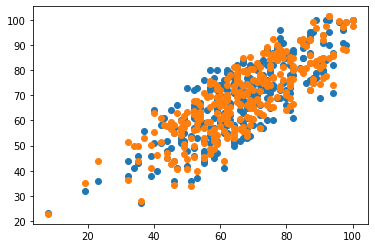

In [19]:
plt.scatter(X_test['mocktest1'],Y_test)#blue
plt.scatter(X_test['mocktest1'],Y_predicted)#orange

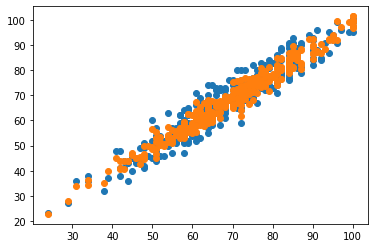

In [20]:
plt.scatter(X_test['mocktest2'],Y_test)#blue
plt.scatter(X_test['mocktest2'],Y_predicted)#orange

# now rounding our data as marks cant be decimal 

In [21]:
Y_round_predicted=Y_predicted.round()
Y_round_predicted

array([[ 85.],
       [ 66.],
       [ 83.],
       [ 65.],
       [ 67.],
       [ 64.],
       [ 34.],
       [ 57.],
       [ 82.],
       [ 61.],
       [ 85.],
       [ 88.],
       [ 99.],
       [ 76.],
       [ 72.],
       [ 93.],
       [ 75.],
       [100.],
       [ 77.],
       [ 77.],
       [ 70.],
       [ 57.],
       [ 89.],
       [ 45.],
       [ 41.],
       [ 75.],
       [ 77.],
       [ 56.],
       [ 87.],
       [ 40.],
       [ 79.],
       [ 45.],
       [ 92.],
       [ 46.],
       [ 58.],
       [ 56.],
       [ 78.],
       [ 67.],
       [ 69.],
       [ 56.],
       [ 70.],
       [ 53.],
       [ 84.],
       [ 74.],
       [ 51.],
       [ 72.],
       [ 68.],
       [ 61.],
       [ 59.],
       [ 83.],
       [ 68.],
       [ 66.],
       [ 76.],
       [ 90.],
       [ 52.],
       [ 92.],
       [ 53.],
       [ 67.],
       [ 62.],
       [ 73.],
       [ 68.],
       [ 57.],
       [ 78.],
       [ 64.],
       [ 58.],
       [ 74.],
       [ 7